<a href="https://colab.research.google.com/github/Sans7349/CodeClause_Ref-CC2024071991703---Sanjay-J/blob/main/Intermediate_Level_Demand_Forecasting_for_a_Retail_Store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Store  Dept       Date  Weekly_Sales  IsHoliday
0      1     1 2010-02-05      24924.50      False
1      1     1 2010-02-12      46039.49       True
2      1     1 2010-02-19      41595.55      False
3      1     1 2010-02-26      19403.54      False
4      1     1 2010-03-05      21827.90      False


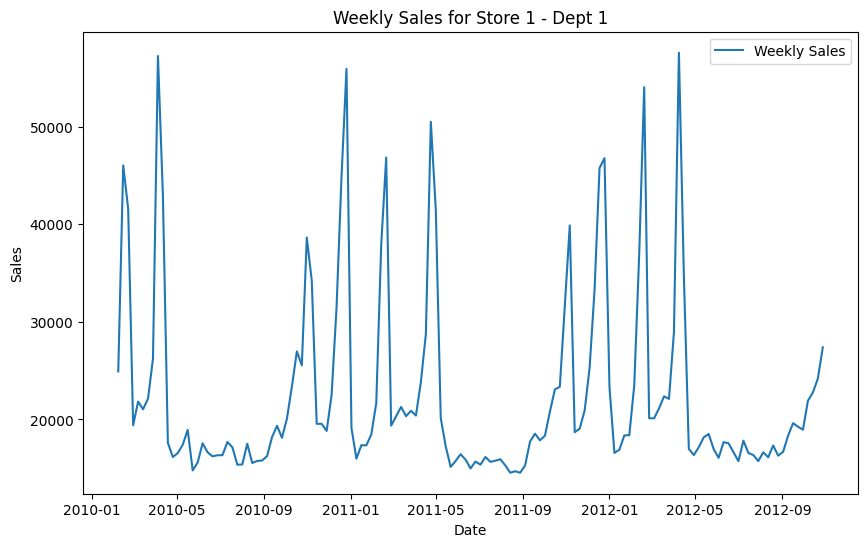

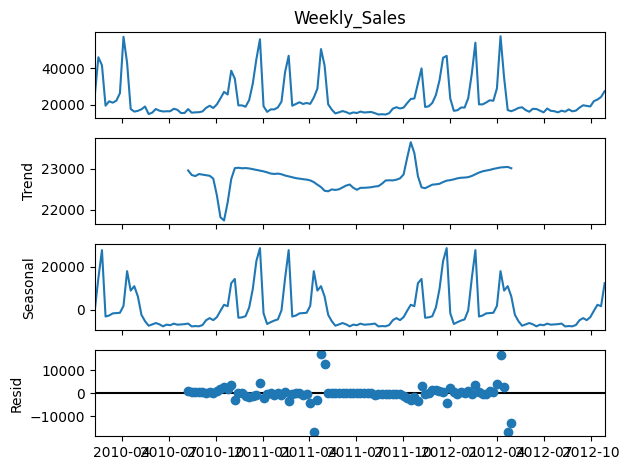

RMSE: 18830.77


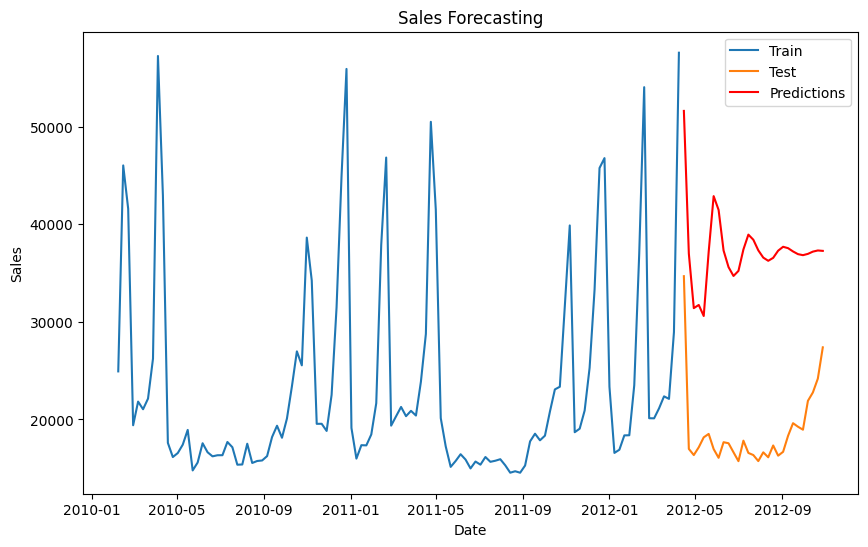

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

url = '/content/train.csv'
data = pd.read_csv(url, parse_dates=['Date'])

print(data.head())

store_data = data[(data['Store'] == 1) & (data['Dept'] == 1)]

store_data.set_index('Date', inplace=True)

store_data = store_data['Weekly_Sales'].resample('W').sum()

store_data = store_data.fillna(store_data.mean())

plt.figure(figsize=(10, 6))
plt.plot(store_data, label='Weekly Sales')
plt.title('Weekly Sales for Store 1 - Dept 1')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

decomposition = seasonal_decompose(store_data, model='additive')
decomposition.plot()
plt.show()

train_size = int(len(store_data) * 0.8)
train, test = store_data[0:train_size], store_data[train_size:]

model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

predictions = model_fit.forecast(steps=len(test))
test = test.to_frame()
test['Predictions'] = predictions

error = np.sqrt(mean_squared_error(test['Weekly_Sales'], test['Predictions']))
print(f'RMSE: {error:.2f}')

plt.figure(figsize=(10, 6))
plt.plot(train, label='Train')
plt.plot(test['Weekly_Sales'], label='Test')
plt.plot(test['Predictions'], label='Predictions', color='red')
plt.title('Sales Forecasting')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
